In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 200

## Leemos el dataset y configuramos los tipos de dato de cada columna

In [3]:
df = pd.read_csv('./src/AccidentesAvionesLimpio.csv')

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df[['Ubicación', 'Operador', 'Ruta', 'Tipo de aeronave', 'Resumen']] = df[['Ubicación', 'Operador', 'Ruta', 'Tipo de aeronave', 'Resumen']].astype('string')
df[['Total a bordo', 'Pasajeros a bordo', 'Tripulación a bordo','Total fallecidos', 'Fallecidos pasajeros', 'Fallecidos tripulación','Fallecidos en tierra']]\
    = df[['Total a bordo', 'Pasajeros a bordo', 'Tripulación a bordo','Total fallecidos', 'Fallecidos pasajeros', 'Fallecidos tripulación','Fallecidos en tierra']].astype('Int64')
    
    
df_pasajeros = pd.read_csv('./src/Pasajeros-por-año-1970-2021.csv')
df_causas = pd.read_csv('./src/CrashCausesLabels.csv')

Buscamos la cantidad de datos faltantes en cada columna

In [4]:
df.isna().sum()

Fecha                       0
Ubicación                   5
Operador                   10
Ruta                      763
Tipo de aeronave           13
Total a bordo              17
Pasajeros a bordo         221
Tripulación a bordo       219
Total fallecidos            8
Fallecidos pasajeros      235
Fallecidos tripulación    235
Fallecidos en tierra       44
Resumen                    59
dtype: int64

In [5]:
df.loc[df['Total fallecidos'].isna()]

,Fecha,Ubicación,Operador,Ruta,Tipo de aeronave,Total a bordo,Pasajeros a bordo,Tripulación a bordo,Total fallecidos,Fallecidos pasajeros,Fallecidos tripulación,Fallecidos en tierra,Resumen
103,1925-09-07,"Toul, France",CIDNA,<NA>,Spad 33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
347,1934-08-10,"Ningbo, China",China National Aviation Corporation,<NA>,Sikorsky S-38B,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
384,1935-08-13,"Hangow, China",China National Aviation Corporation,<NA>,Sikorsky S-38B,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Destoryed in a storm.
451,1936-12-26,"Nanking, China",China National Aviation Corporation,<NA>,Douglas DC-2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
652,1942-10-01,"Kunming, China",China National Aviation Corporation,<NA>,Douglas C-47,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Crashed while attempting to land after losing oil pressure on one engine.
754,1944-11-09,"Seljord, Norway",Military - U.S. Army Air Corps,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
854,1946-03-18,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Disappeared while en route. Plane never located.
1451,1954-03-13,"Dien Bien Phu, South Vietnam",Aigle Azur,<NA>,C-46,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Shot down.


Decidimos no eliminar los registros porque tienen algo de información que puede ser útil

### Comenzamos a analizar los accidentes por año

In [6]:
accidentes_por_año = df.groupby(df['Fecha'].dt.year).agg({'Fecha':'count', 'Total fallecidos': 'sum'}).rename(columns={'Fecha': 'Accidentes'}) .reset_index()
accidentes_por_año['Media de fallecidos'] = accidentes_por_año['Total fallecidos'] / accidentes_por_año['Accidentes']
accidentes_por_año

,Fecha,Accidentes,Total fallecidos,Media de fallecidos
0,1908,1,1,1.00
1,1909,1,1,1.00
2,1912,1,5,5.00
3,1913,3,43,14.33
4,1915,2,36,18.00
...,...,...,...,...
106,2017,15,214,14.27
107,2018,19,874,46.00
108,2019,13,305,23.46
109,2020,8,355,44.38


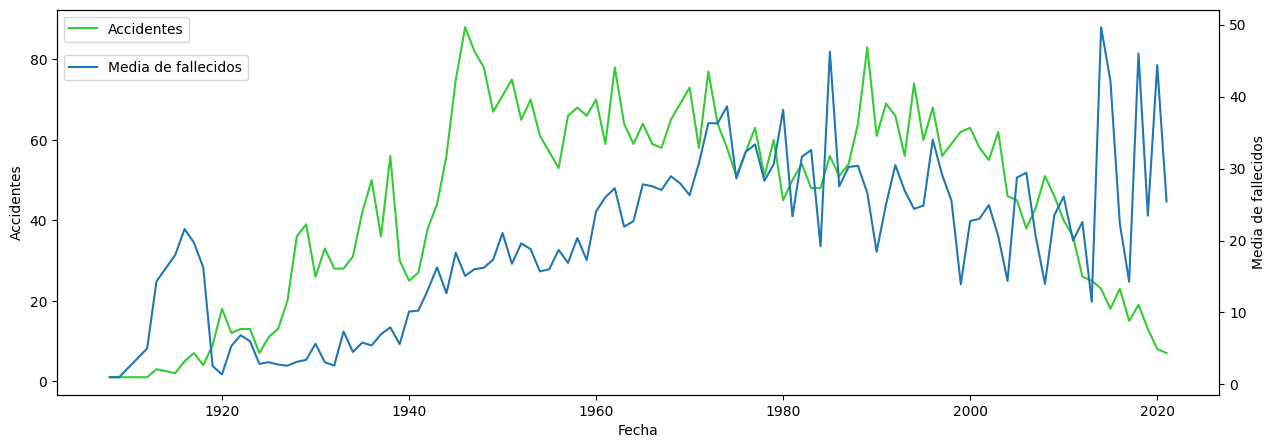

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=accidentes_por_año, x='Fecha', y='Accidentes', color='limegreen', label='Accidentes')
plt.legend(loc='upper left')
plt.twinx()
sns.lineplot(data=accidentes_por_año, x='Fecha', y='Media de fallecidos', label='Media de fallecidos')
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))


Se puede observar que la cantidad de accidentes aereos fue en aumento desde el comienzo de la aviación hasta estabilizarse relativamente desde aproximadamente los años 50 hasta los 90s, donde comienza un marcado declive de los mismos. 
Por otro lado, la media de accidentes por vuelo tendió a aumentar hasta al rededor de los años 80s, posiblemente debido al aumento en la capacidad de pasajeros de las aeronaves.

In [8]:
accidentes_por_año_1970_2021 = accidentes_por_año[accidentes_por_año['Fecha'] >= 1970]
accidentes_por_año_1970_2021['Total pasajeros'] = df_pasajeros['total'].values
accidentes_por_año_1970_2021['Accidentes cada millón de pasajeros'] = accidentes_por_año_1970_2021['Accidentes'] / (accidentes_por_año_1970_2021['Total pasajeros'] / 1000000)
accidentes_por_año_1970_2021['Fallecidos cada millón de pasajeros'] = accidentes_por_año_1970_2021['Total fallecidos'] / (accidentes_por_año_1970_2021['Total pasajeros'] / 1000000)

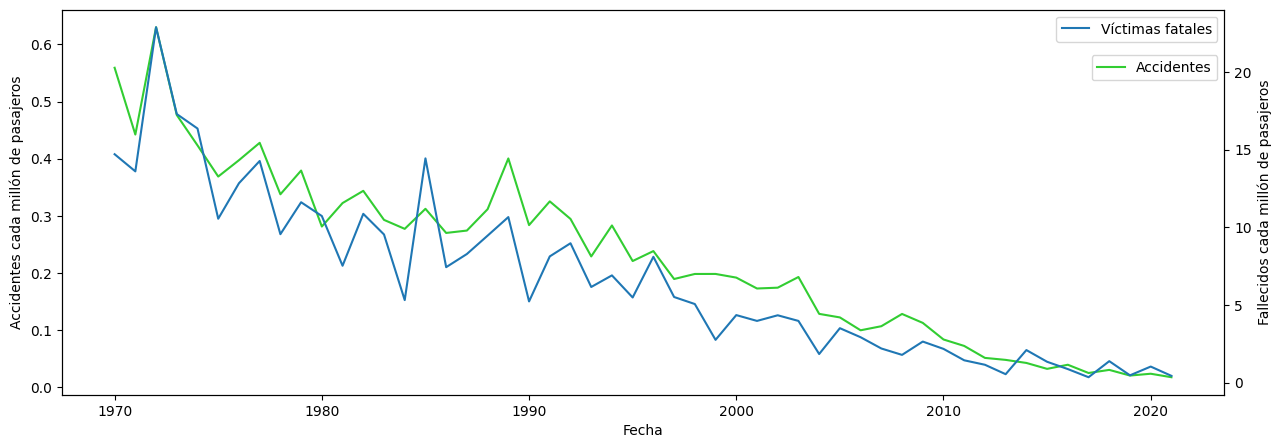

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=accidentes_por_año_1970_2021, x='Fecha', y='Accidentes cada millón de pasajeros', color='limegreen', label='Accidentes')
plt.twinx()
sns.lineplot(data=accidentes_por_año_1970_2021, x='Fecha', y='Fallecidos cada millón de pasajeros', label='Víctimas fatales')
sns.move_legend(ax, "upper right", ncol=2, bbox_to_anchor=(1, 0.9))

Podemos ver con la información disponible desde el año 70, que la tasa de accidentes y de fallecidos por cantidad de pasajeros totales a nivel global ha ido disminuyendo de manera constante 

### Accidentes por tipo de aeronave

In [39]:
accidentes_por_aeronave = df.groupby(df['Tipo de aeronave']).agg({'Fecha':'count', 'Total fallecidos': 'sum'}).rename(columns={'Fecha': 'Accidentes'}).reset_index()
accidentes_por_aeronave['Media de fallecidos'] = accidentes_por_aeronave['Total fallecidos'] / accidentes_por_aeronave['Accidentes']
accidentes_por_aeronave.sort_values(by='Total fallecidos', ascending=False, inplace=True)
accidentes_por_aeronave['Primer accidente'] = df.groupby(df['Tipo de aeronave']).agg({'Fecha':'min'}).reset_index()['Fecha'].dt.year.astype('Int64')
accidentes_por_aeronave.loc[accidentes_por_aeronave['Tipo de aeronave'].str.contains('737')].head(50)

,Tipo de aeronave,Accidentes,Total fallecidos,Media de fallecidos,Primer accidente
534,Boeing B-737-222,4,350,87.50,1972
549,Boeing B-737-2A8,5,297,59.40,1973
528,Boeing B-737-200,5,254,50.80,1982
414,Boeing 737-MAX 8,1,189,189.00,2018
411,Boeing 737-8HG,2,179,89.50,2010
413,Boeing 737-8KV WL,1,176,176.00,2020
554,Boeing B-737-2H6,2,165,82.50,1977
388,Boeing 737 Max 8,1,157,157.00,2019
581,Boeing B-737-8EH /EMB-135JB,1,154,154.00,2006
569,Boeing B-737-3Y0,2,149,74.50,1990


La cantidad de versiones de cada modelo de aeronave en algunos casos es muy grande, lo que impide realizar el análisis adecuado al no contar con con la información técnica que permita agruparlos de manera adecuada. De todas maneras, intentemos analizar al menos con aquellos que suman más de un accidente total.

In [41]:
accidentes_por_aeronave = accidentes_por_aeronave.loc[accidentes_por_aeronave['Accidentes'] > 1].sort_values(by='Accidentes', ascending=False)
accidentes_por_aeronave.shape

(605, 5)

<Axes: xlabel='Accidentes', ylabel='Tipo de aeronave'>

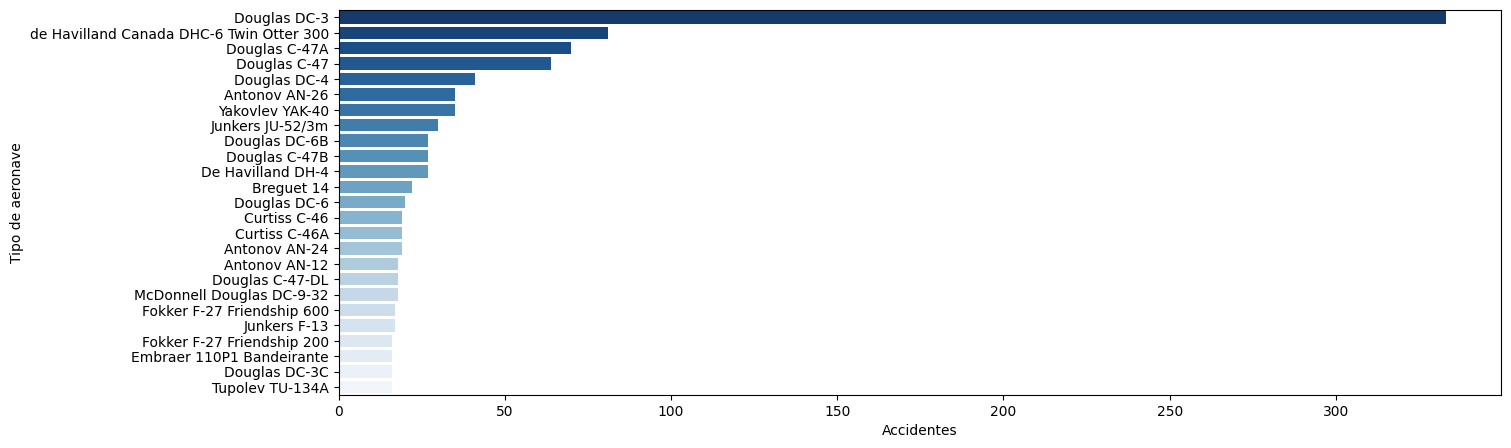

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(data=accidentes_por_aeronave.head(25), x='Accidentes', y='Tipo de aeronave', palette='Blues_r', orient='h')

Ordenemos por fecha del primer accidente como proxy de la antiguedad del modelo

(0.0, 50.0)

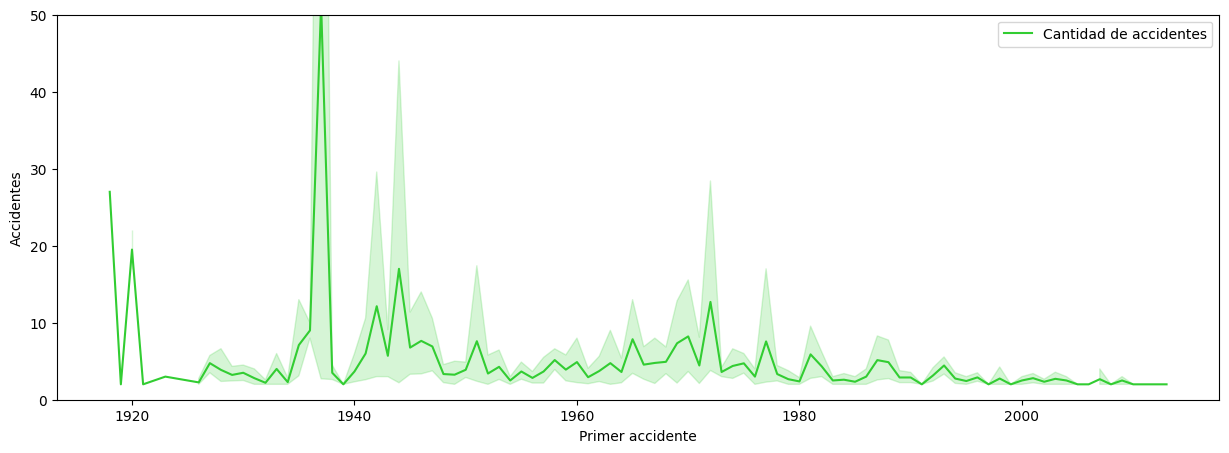

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=accidentes_por_aeronave, x='Primer accidente', y='Accidentes', color='limegreen', label='Cantidad de accidentes')
plt.ylim(0, 50)


Podemos concluir que los modelos se han hecho más seguros con el paso del tiempo, aunque no se puede afirmar que sea debido a la antiguedad del modelo, ya que puede ser debido a otros factores como la cantidad de unidades en servicio, la cantidad de horas de vuelo, y la dispersión en las revisiones de cada modelo que se muestra en el dataset.

### Operadores

In [ ]:
accidentes_por_operador = df.groupby(df['Operador']).agg({'Fecha':'count', 'Total fallecidos': 'sum'}).rename(columns={'Fecha': 'Accidentes'}).reset_index()
accidentes_por_operador['Media de fallecidos'] = accidentes_por_operador['Total fallecidos'] / accidentes_por_operador['Accidentes']
accidentes_por_operador.sort_values(by='Total fallecidos', ascending=False, inplace=True)

<Axes: xlabel='Total fallecidos', ylabel='Operador'>

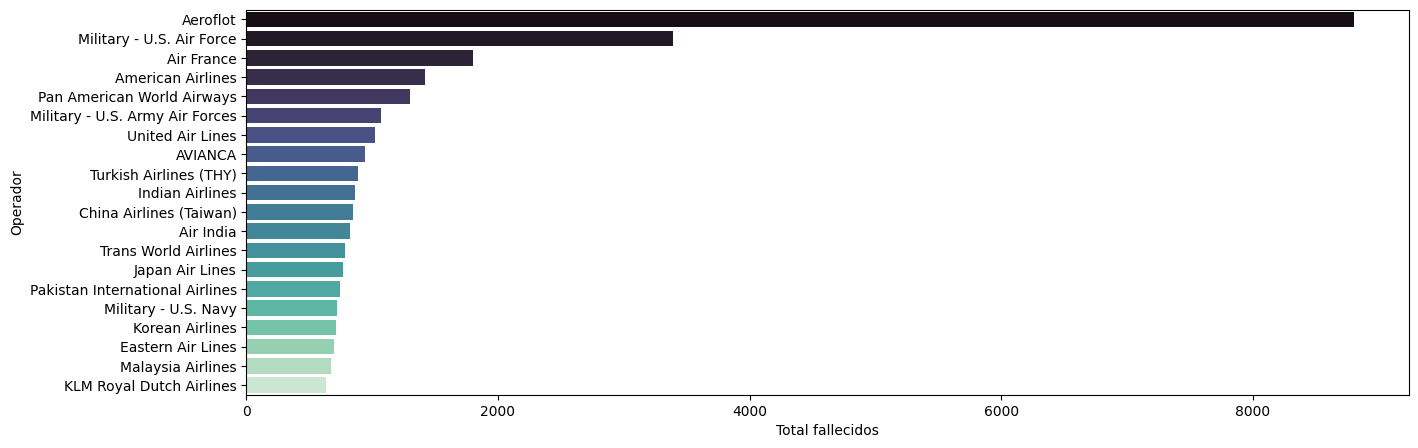

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=accidentes_por_operador.head(20), x='Total fallecidos', y='Operador', palette='Blues_r', orient='h')

Vemos que el operador aeroflot tiene una proporción de accidentes muy alta, y sin considerar los vuelos militares, Air France, American Airlines y United Airlines son los que más accidentes han tenido. Probablemente esto se deba a que son o han sido operadores muy grandes, y no necesariamente a que sean menos seguros que otros operadores. Habría que cruzar esta información con la cantidad de vuelos realizados por cada operador para poder sacar conclusiones más precisas.

### Tasas de fatalidad

In [48]:
df.loc[df['Total a bordo'].isna()]

,Fecha,Ubicación,Operador,Ruta,Tipo de aeronave,Total a bordo,Pasajeros a bordo,Tripulación a bordo,Total fallecidos,Fallecidos pasajeros,Fallecidos tripulación,Fallecidos en tierra,Resumen
26,1919-07-21,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,<NA>,<NA>,<NA>,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fire and crashed into the Illinois Trust and Savings Building in Chicago. The was transporting people from Grant Park to the White City amusement park.[..."
103,1925-09-07,"Toul, France",CIDNA,<NA>,Spad 33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
347,1934-08-10,"Ningbo, China",China National Aviation Corporation,<NA>,Sikorsky S-38B,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
384,1935-08-13,"Hangow, China",China National Aviation Corporation,<NA>,Sikorsky S-38B,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Destoryed in a storm.
451,1936-12-26,"Nanking, China",China National Aviation Corporation,<NA>,Douglas DC-2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
652,1942-10-01,"Kunming, China",China National Aviation Corporation,<NA>,Douglas C-47,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Crashed while attempting to land after losing oil pressure on one engine.
754,1944-11-09,"Seljord, Norway",Military - U.S. Army Air Corps,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
854,1946-03-18,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Disappeared while en route. Plane never located.
1231,1951-01-20,"Huilyo, Peru",Military - TAM,<NA>,Douglas DC-3,<NA>,<NA>,<NA>,16,<NA>,<NA>,<NA>,<NA>
1362,1952-12-22,"Damascus, Syria",Syrian Air,<NA>,Douglas DC-3,<NA>,<NA>,<NA>,9,<NA>,<NA>,<NA>,<NA>


Eliminamos los registros que no tienen información sobre la cantidad de pasajeros y tripulación, recalculamos los que tienen total a bordo 0, y eliminamos los que queden con total a bordo 0.

In [49]:
tasas_fatalidad = df.dropna(subset=['Total a bordo', 'Tripulación a bordo', 'Pasajeros a bordo'])
tasas_fatalidad['Total a bordo'] = tasas_fatalidad['Tripulación a bordo'] + tasas_fatalidad['Pasajeros a bordo']
tasas_fatalidad.drop(tasas_fatalidad[tasas_fatalidad['Total a bordo'] == 0].index, inplace=True)


In [50]:
tasas_fatalidad['Tasa de fatalidad'] = tasas_fatalidad['Total fallecidos'] / tasas_fatalidad['Total a bordo']
tasas_fatalidad['Tasa de fatalidad tripulación'] = tasas_fatalidad['Fallecidos tripulación'] / tasas_fatalidad['Tripulación a bordo']
tasas_fatalidad['Tasa de fatalidad pasajeros'] = tasas_fatalidad['Fallecidos pasajeros'] / tasas_fatalidad['Pasajeros a bordo']

In [51]:
tasas_fatalidad.dropna(subset=['Tasa de fatalidad', 'Tasa de fatalidad tripulación', 'Tasa de fatalidad pasajeros'], inplace=True)

In [52]:
tasas_fatalidad_pasajeros = tasas_fatalidad.loc[tasas_fatalidad['Pasajeros a bordo'] > 0]

In [53]:
tasas_fatalidad_tripulacion = tasas_fatalidad.groupby(tasas_fatalidad['Fecha'].dt.year).agg({'Fecha':'count', 'Tasa de fatalidad': 'mean', 'Tasa de fatalidad tripulación': 'mean'})\
    .rename(columns={'Fecha': 'Accidentes'}).reset_index()
    
tasas_fatalidad_pasajeros = tasas_fatalidad_pasajeros.groupby(tasas_fatalidad_pasajeros['Fecha'].dt.year).agg({'Fecha':'count', 'Tasa de fatalidad': 'mean', 'Tasa de fatalidad pasajeros': 'mean'})\
    .rename(columns={'Fecha': 'Accidentes'}).reset_index()

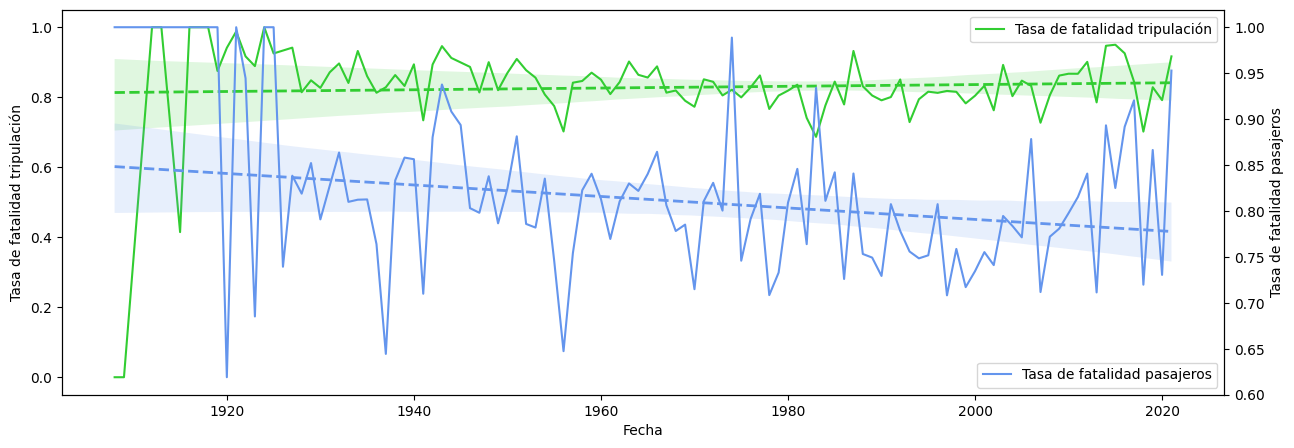

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=tasas_fatalidad_tripulacion, x='Fecha', y='Tasa de fatalidad tripulación', color='limegreen', label='Tasa de fatalidad tripulación')
sns.regplot(x=tasas_fatalidad_tripulacion['Fecha'].astype(float), y=tasas_fatalidad_tripulacion['Tasa de fatalidad tripulación'].astype(float),\
    color='limegreen', scatter=False, line_kws={'linestyle': '--', "lw":2})
plt.twinx()
sns.lineplot(data=tasas_fatalidad_pasajeros, x='Fecha', y='Tasa de fatalidad pasajeros', label='Tasa de fatalidad pasajeros', color='cornflowerblue')
sns.regplot(x=tasas_fatalidad_pasajeros['Fecha'].astype(float), y=tasas_fatalidad_pasajeros['Tasa de fatalidad pasajeros'].astype(float),\
    color='cornflowerblue', scatter=False, line_kws={'linestyle': '--', "lw":2})
plt.legend(loc='lower right')

Podemos observar que la tasa de fatalidad de los pasajeros ha tenido una tendencia a la baja, mientras que la de la tripulación tiene una leve tendencia al alza. Esta diferencia podría explicarse porque la relación entre la cantidad de pasasjeros y tripulacíon ha ido aumentando con el desarrollo de aeronaves de mayor capacidad.

In [55]:
tasas_fatalidad['Relación tripulación-pasajeros'] = tasas_fatalidad['Pasajeros a bordo'] / tasas_fatalidad['Tripulación a bordo']
relacion_trip_pasaj = tasas_fatalidad.groupby(tasas_fatalidad['Fecha'].dt.year).agg({'Fecha':'count', 'Relación tripulación-pasajeros': 'mean'})\
    .rename(columns={'Fecha': 'Accidentes'}).reset_index()

<Axes: xlabel='Fecha', ylabel='Relación tripulación-pasajeros'>

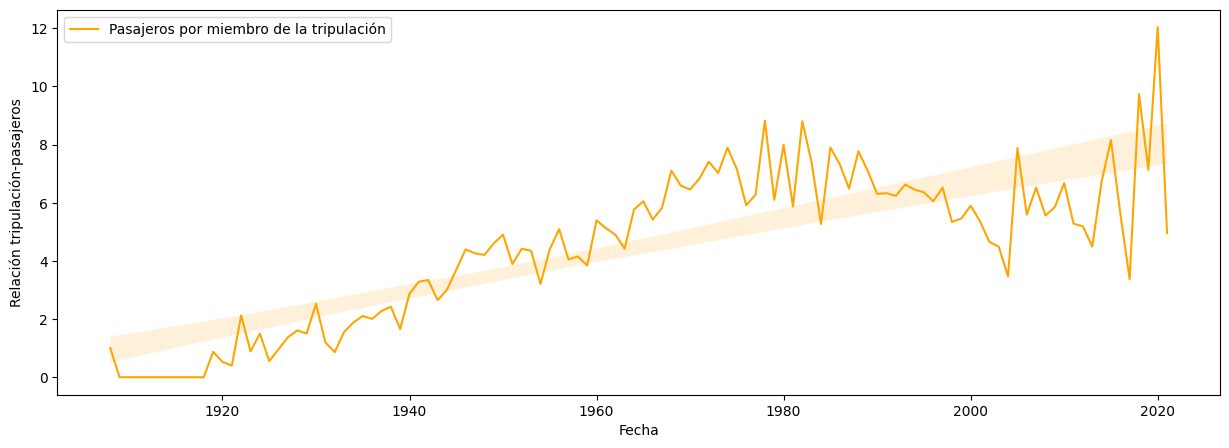

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=relacion_trip_pasaj, x='Fecha', y='Relación tripulación-pasajeros', color='orange', label='Pasajeros por miembro de la tripulación')
sns.regplot(x=relacion_trip_pasaj['Fecha'].astype(float), y=relacion_trip_pasaj['Relación tripulación-pasajeros'].astype(float),\
    color='orange', scatter=False, line_kws={'linestyle': '--', "lw":2})

<Axes: xlabel='Fecha', ylabel='Tasa de fatalidad'>

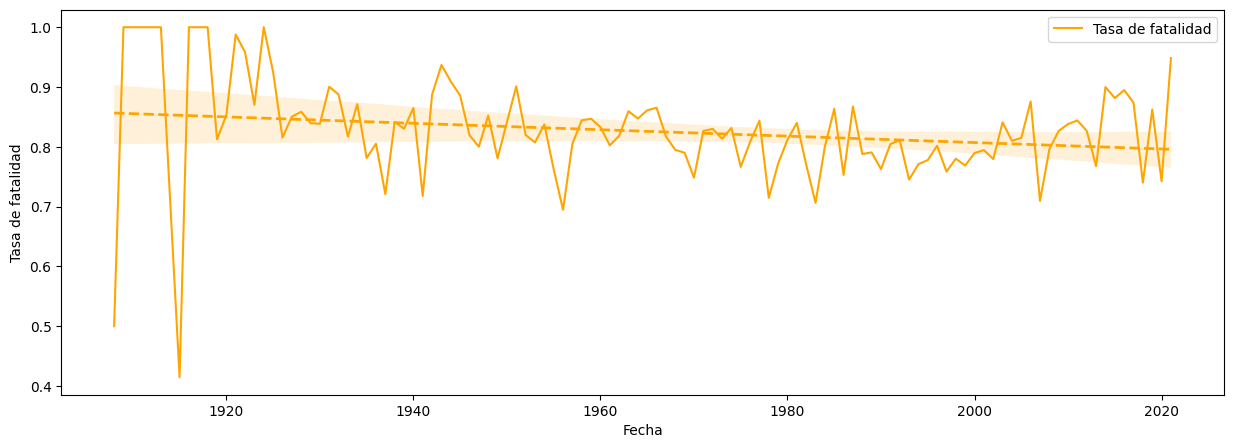

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=tasas_fatalidad_tripulacion, x='Fecha', y='Tasa de fatalidad', color='orange', label='Tasa de fatalidad')
sns.regplot(x=tasas_fatalidad_tripulacion['Fecha'].astype(float), y=tasas_fatalidad_tripulacion['Tasa de fatalidad'].astype(float),\
    color='orange', scatter=False, line_kws={'linestyle': '--', "lw":2})

Por último podemos ver que la tasa de fatalidad en general ha ido disminuyendo, lo que podría explicarse en parte por el aumento en la seguridad de las aeronaves y la mejora en los protocolos de emergencia.

### Causas de accidentes

La clasificación de las causas se realizó usando la técnica de zero shot classification, con el modelo [DeBERTa-v3-base-mnli-fever-anli](https://huggingface.co/MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli), categorizando los textos entre las clases error humano, falla mecánica, clima, combate, otros y desconocido. Al no tratarse de una clasificación hecha a mano, es posible que no sea del todo precisa, pero nos permite tener una idea general de las causas de los accidentes.

In [58]:
df_con_causas = df
df_con_causas['Causa'] = df_causas['Crash Cause'].values

In [59]:
accidentes_por_causa = df_con_causas.groupby(df_con_causas['Causa']).agg({'Fecha':'count'}).rename(columns={'Fecha': 'Accidentes'}).reset_index()

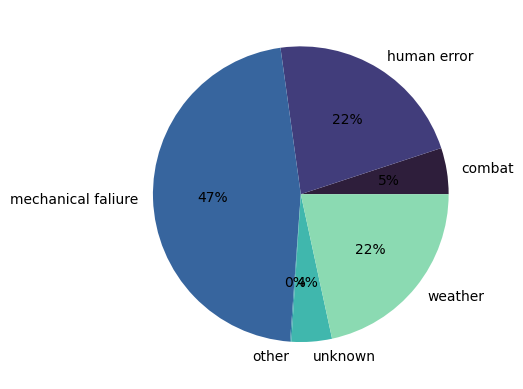

In [60]:
palette_color = sns.color_palette('mako') 
  
plt.pie(accidentes_por_causa['Accidentes'], labels=accidentes_por_causa['Causa'], colors=palette_color, autopct='%.0f%%') 
  
plt.show() 

Podemos ver que cerca del 50% de los accidentes del dataset se deben a fallas mecánicas, pero es posible que los porcentajes fueran cambiando a lo largo de los años.

In [61]:
causas_por_años = pd.get_dummies(df_con_causas, columns=['Causa'], dtype=int, prefix='', prefix_sep='')
causas_por_años = causas_por_años.groupby((causas_por_años['Fecha'].dt.year // 10) * 10).agg({'Fecha': 'count', 'human error': 'sum', 'mechanical faliure': 'sum',\
    'weather': 'sum', 'combat': 'sum', 'other': 'sum', 'unknown': 'sum'}).rename(columns={'Fecha': 'Total'}).reset_index()
causas_por_años


,Fecha,Total,human error,mechanical faliure,weather,combat,other,unknown
0,1900,2,2,0,0,0,0,0
1,1910,31,5,5,7,11,0,3
2,1920,182,22,79,58,2,2,19
3,1930,360,60,128,134,11,0,27
4,1940,580,132,224,130,49,1,44
5,1950,652,152,328,124,19,1,28
6,1960,645,158,301,118,25,2,41
7,1970,612,137,303,115,31,0,26
8,1980,553,117,272,104,45,1,14
9,1990,631,138,299,145,41,0,8


Vemos que la mayor causa sigue siendo las fallas mecánicas, lo que no coincide con información de otras fuentes, por lo que es posible que el modelo no haya sido capaz de clasificar correctamente los textos, o que la información de otras fuentes no sea del todo precisa. 

### KPIs

El primer kpi propuesto es la reducción en un 10% de la tasa de fatalidad de la tripulación de esta década con respecto de la anterior, definido como la cantidad de tripulantes fallecidos por accidente dividido la cantidad de accidentes.
EL segundo KPI a analizar es la reducción en un 10% de la tasa de accidentes por millón de pasajeros por década, definido como la cantidad de accidentes dividido la cantidad de pasajeros por década, multiplicado por 1.000.000.

In [98]:
kpi_df = df.groupby(df['Fecha'].dt.year).agg({'Fecha':'count', 'Total fallecidos': 'sum', 'Fallecidos tripulación': 'sum', 'Tripulación a bordo': 'sum'})\
    .rename(columns={'Fecha': 'Accidentes'}) .reset_index()
kpi_df = kpi_df.loc[kpi_df['Fecha'] >= 1970]
kpi_df['Total pasajeros'] = df_pasajeros['total'].values
kpi_df = kpi_df.groupby((kpi_df['Fecha'] // 10) * 10).agg({'Accidentes':'sum', 'Total fallecidos': 'sum', 'Fallecidos tripulación': 'sum', 'Total pasajeros' : 'sum',\
    'Tripulación a bordo': 'sum'}).reset_index()
kpi_df['Tasa de fatalidad de tripulación'] = kpi_df['Fallecidos tripulación'] / kpi_df['Accidentes']
kpi_df['Tasa de accidentes'] = kpi_df['Accidentes'] / kpi_df['Total pasajeros'] * 1000000
kpi_df['Tripulación por accidente'] = kpi_df['Tripulación a bordo'] / kpi_df['Accidentes']


In [93]:
tft2000s = kpi_df.loc[kpi_df['Fecha'] == 2000]['Tasa de fatalidad de tripulación'].values[0]
tft2010s = kpi_df.loc[kpi_df['Fecha'] == 2010]['Tasa de fatalidad de tripulación'].values[0]
tft2020s = kpi_df.loc[kpi_df['Fecha'] == 2020]['Tasa de fatalidad de tripulación'].values[0]

diferencia_2000_2010 = (tft2010s - tft2000s) / tft2000s * 100
diferencia_2010_2020 = (tft2020s - tft2010s) / tft2010s * 100

print(f'{diferencia_2000_2010:.2f}%')
print(f'{diferencia_2010_2020:.2f}%')

10.29%
14.41%


In [94]:
ta2000s = kpi_df.loc[kpi_df['Fecha'] == 2000]['Tasa de accidentes'].values[0]
ta2010s = kpi_df.loc[kpi_df['Fecha'] == 2010]['Tasa de accidentes'].values[0]
ta2020s = kpi_df.loc[kpi_df['Fecha'] == 2020]['Tasa de accidentes'].values[0]

diferencia_2000_2010 = (ta2010s - ta2000s) / ta2000s * 100
diferencia_2010_2020 = (ta2020s - ta2010s) / ta2010s * 100

print(f'{diferencia_2000_2010:.2f}%')
print(f'{diferencia_2010_2020:.2f}%')

-69.57%
-52.83%


Para la tasa de fatalidad de la tripulación, vemos que de la década del 2000 a las del 2010, y de esta a la actual, lejos de cumplirse el objetivo se ha incrementado en un 10,3, y un 14,4 respectivamente. Esto podría deberse al aumento de la capacidad de las aeronaves. (Por ejemplo, un Airbus A380 que puede llevar a más de 500 pasajeros, requiere una tripulación de cabina de al menos 10 personas, y hasta 24 operando a capacidad completa)

<Axes: xlabel='Fecha', ylabel='Tripulación por accidente'>

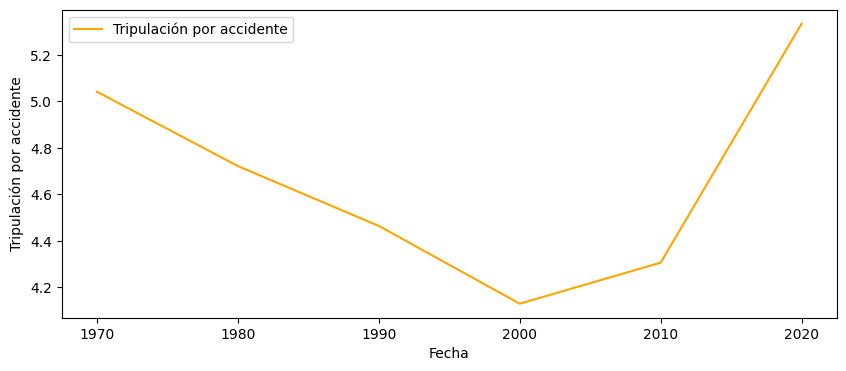

In [102]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=kpi_df, x='Fecha', y='Tripulación por accidente', color='orange', label='Tripulación por accidente')

Graficando la media de tripulación por accidente, confirmamos que entre las décadas consideradas se mantuvo en aumento, reforzando nuestra hipótesis.

Con realación al otro KPI propuesto, la reducción en un 10% de la cantidad de accidentes cada millón de pasajeros, vemos que se cumple con sobras. Entre la década del 2000 y las del 2010 se redujo en un 69.6%, y entre esta última y lo que va de la actual, la reducción es del 52,8%. Volar es cada vez más seguro gracias a los avances en la tecnología y los protocolos de seguridad. Estos avances afectan de manera directa una de las principales causas de accidentes, las fallas mecánicas. También es esperable que la introducción de sistemas de inteligenica artificial en los sistemas de control de vuelo contribuyan en un futuro a reducir aún más la cantidad de accidentes debido a errores humanos.